In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Исходная функция
def f(x:float) -> float:
    return np.exp(x) + np.cos(x)

In [4]:
m_eps = 1.0
while 1.0 + m_eps/2 != 1.0:
    m_eps /= 2
m_eps /= 2
print('Машинный эпсилон: {:.2e}'.format(m_eps))

Машинный эпсилон: 1.11e-16


In [5]:
m_zero = 1
p = 0
while m_zero > 0:
    m_zero /= 10
    p += 1
print('Машинный ноль: {:.2e}, или 10^-{}'.format(m_zero, p))

Машинный ноль: 0.00e+00, или 10^-324


In [6]:
m_inf = 1.0
p = 0
while m_inf < np.inf:
    m_inf *= 10
    p += 1
print('Машинная бесконечность: 10^{}'.format(p))

Машинная бесконечность: 10^309


In [7]:
#Формула n-го члена ряда
def n_term(x, n):
    if n%2:
        return x**n/np.math.factorial(n)
    elif n%4 == 2:
        return 0
    else:
        return 2 * x**n/np.math.factorial(n)

#Формула n-ой частичной суммы
def S(x, n):
    func_sum = 0
    for i in range(0, n+1):
        func_sum += n_term(x, i)
    return func_sum

#Ф-я, вычисляющая абсолютную погрешность между функциями f и S
def abs_err(data, f, S, N):
    return np.abs(f(data) - S(data, N))

#Ф-я, вычисляющая относительную погрешность между функциями f и S
def rel_err(data, f, S, N):
    return np.abs(abs_err(data, f, S, N)/S(data, N))

In [8]:
a = -2
b = 2
x_data = np.linspace(a, b, 1000)

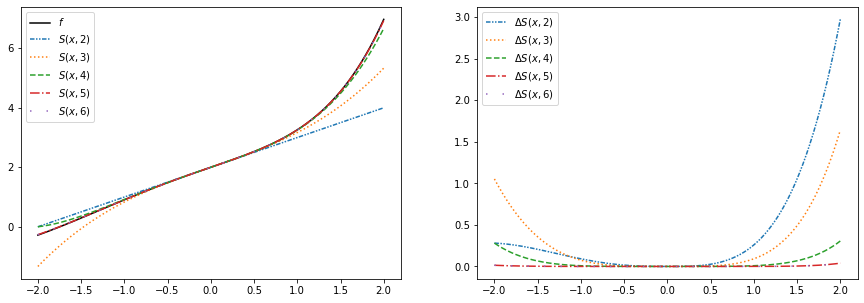

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(x_data, f(x_data), label='$f$', color="black")

line_styles = ((0, (3, 1, 1, 1, 1, 1)), 'dotted', 'dashed', 'dashdot', (0, (1, 10)))

for i in range(1, 6):
    axs[0].plot(x_data, S(x_data, i+1), label='$S(x, {})$'.format(i+1), ls=line_styles[i-1])
    
for i in range(1, 6):
    axs[1].plot(x_data, abs_err(x_data, f, S, i+1), label='$\Delta S(x, {})$'.format(i+1), ls=line_styles[i-1])
    
axs[0].legend()
axs[1].legend()
plt.savefig('output_7_1.png')

In [12]:
c = 1.49
p_sum = n_term(c, 1)
N_machine_error = 3
n_t = n_term(c, 3)
#print(p_sum, n_t)
while np.abs(n_t/p_sum) > m_eps:
    p_sum += n_t
    N_machine_error += 1
    n_t = n_term(c, N_machine_error)
    #print(p_sum, n_t)
print(N_machine_error)

6


[(0.0, 1e-14)]

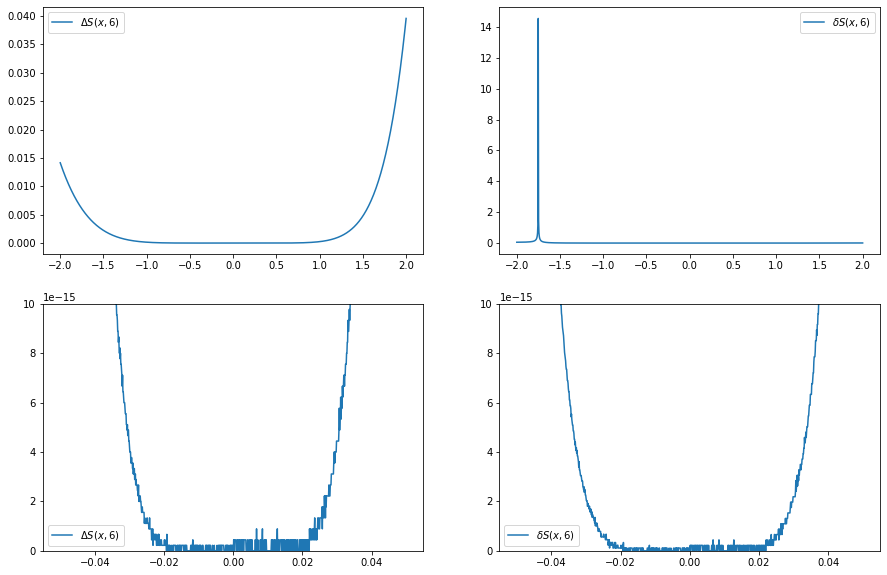

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
x_data2 = np.linspace(-0.05, 0.05, 1000)

axs[0][0].plot(x_data, abs_err(x_data, f, S, N_machine_error), label=f'$\Delta S(x,{N_machine_error})$')

axs[0][1].plot(x_data, rel_err(x_data, f, S, N_machine_error), label=f'$\delta S(x,{N_machine_error})$')

axs[1][0].plot(x_data2, abs_err(x_data2, f, S, N_machine_error), label=f'$\Delta S(x,{N_machine_error})$')

axs[1][1].plot(x_data2, rel_err(x_data2, f, S, N_machine_error), label=f'$\delta S(x,{N_machine_error})$')

axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()
axs[1][0].set(ylim=(0.0, 10E-15))
axs[1][1].set(ylim=(0.0, 10E-15))

In [14]:
def ROUND(x):
    return np.float(np.format_float_scientific(x, precision=3))

In [15]:
def _S_rnd(x, N):
    res = 0
    for i in range(N):
        res += ROUND(n_term(x,i))
        res = ROUND(res)
    return res
def S_rounded(x, N):
    res = x.copy()
    for i in range(len(x)):
        res[i] = _S_rnd(x[i], N)
    return res

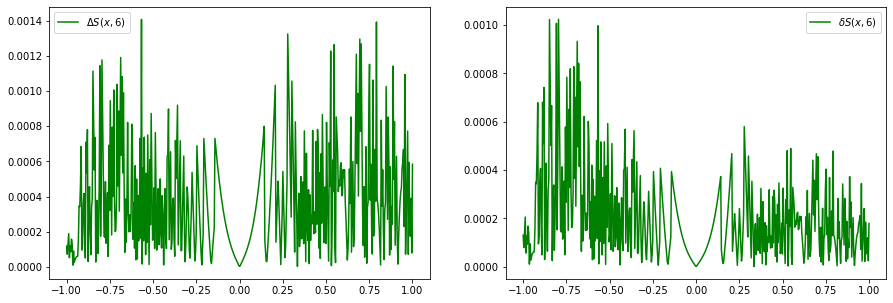

In [16]:
#делаем рисунок из двух графиков
x_data3 = np.linspace(-1.0, 1.0, 500)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(x_data3, abs_err(x_data3, f, S_rounded, N_machine_error),
    label=f'$\Delta S(x,{N_machine_error})$', color='green')

axs[1].plot(x_data3, rel_err(x_data3, f, S_rounded, N_machine_error),
        label=f'$\delta S(x,{N_machine_error})$', color='green')
axs[0].legend()
axs[1].legend()
plt.savefig('output_12_1.png')